In [31]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

In [32]:
# import data with numpy
data = np.loadtxt('data/admission_dataset.txt', delimiter=',')

# number of training data
n = data.shape[0]
print('Number of training data=',n)
print(data.shape)

Number of training data= 100
(100, 3)


In [33]:
x1 = data[:,0] # exam grade 1
x2 = data[:,1] # exam grade 2
idx_admit = (data[:,2]==1) # index of students who were admitted
idx_rejec = (data[:,2]==0) # index of students who were rejected

In [34]:
# construct the data matrix X
n = data.shape[0]
X = np.ones([n,3]) 
X[:,1:3] = data[:,0:2]
y = data[:,2][:,None] # label 

# parameters vector
w = np.array([-10,0.1,-0.2])[:,None] # [:,None] adds a singleton dimension

In [35]:
#Sigmoid/logistic function
def sigmoid(z):
    sigmoid_f =  1/(1+np.exp(-z)) #YOUR CODE HERE
    return sigmoid_f 

In [36]:
# logistic regression/classification predictive function definition
def f_pred(X,w): 
    p =  sigmoid(X.dot(w)) #YOUR CODE HERE
    return p

In [37]:
# logistic regression loss / loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = -1/n* ( y.T.dot(np.log(y_pred)) + (1-y).T.dot(np.log(1-y_pred)) ) #YOUR CODE HERE
    return loss

In [38]:
# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = 2/n* X.T.dot(y_pred-y) #YOUR CODE HERE
    return grad

In [39]:
# gradient descent function definition
def grad_desc(X, y , w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,2]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X,w) # linear predicition function  #YOUR CODE HERE
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss #YOUR CODE HERE
        w = w - tau* grad_f # update rule of gradient descent #YOUR CODE HERE
        L_iters[i] = loss_logreg(y_pred,y) # save the current loss value 
        w_iters[i,:] = w[0],w[1] # save the current w value 
        
    return w, L_iters, w_iters


# run gradient descent algorithm
start = time.time()
w_init = np.array([-10,0.1,-0.2])[:,None]
#w_init = np.array([0,0,0])[:,None]
tau = 1e-4; max_iter = 1000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)

Time= 0.05952000617980957
0.2728192514552289
[[-10.00125246]
 [  0.08547625]
 [  0.07922129]]


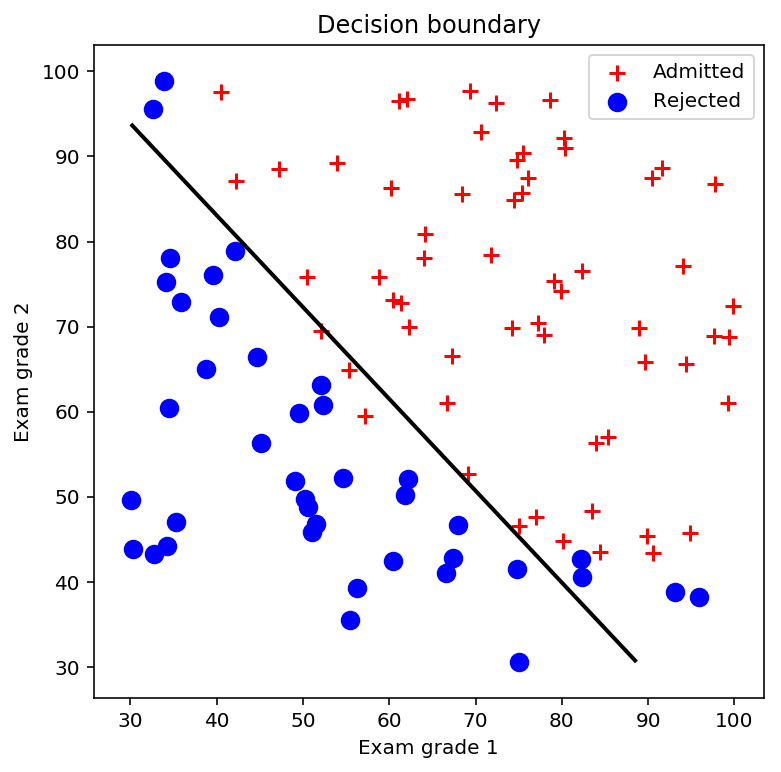

In [40]:
#plot decision boundary
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_admit], x2[idx_admit], s=60, c='r', marker='+', linewidths=2, label='Admitted') #YOUR CODE HERE
plt.scatter(x1[idx_rejec], x2[idx_rejec], s=60, c='b', marker='o', linewidths=2, label='Rejected') #YOUR CODE HERE
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') #YOUR CODE HERE
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend()
plt.title('Decision boundary')
plt.show()


# record p values
p_gd = p

Time= 0.0016241073608398438
[[-24.95527834]
 [  0.20458394]
 [  0.19980387]]
loss sklearn= [[0.20350406]]
loss gradient descent= 0.2728192514552289


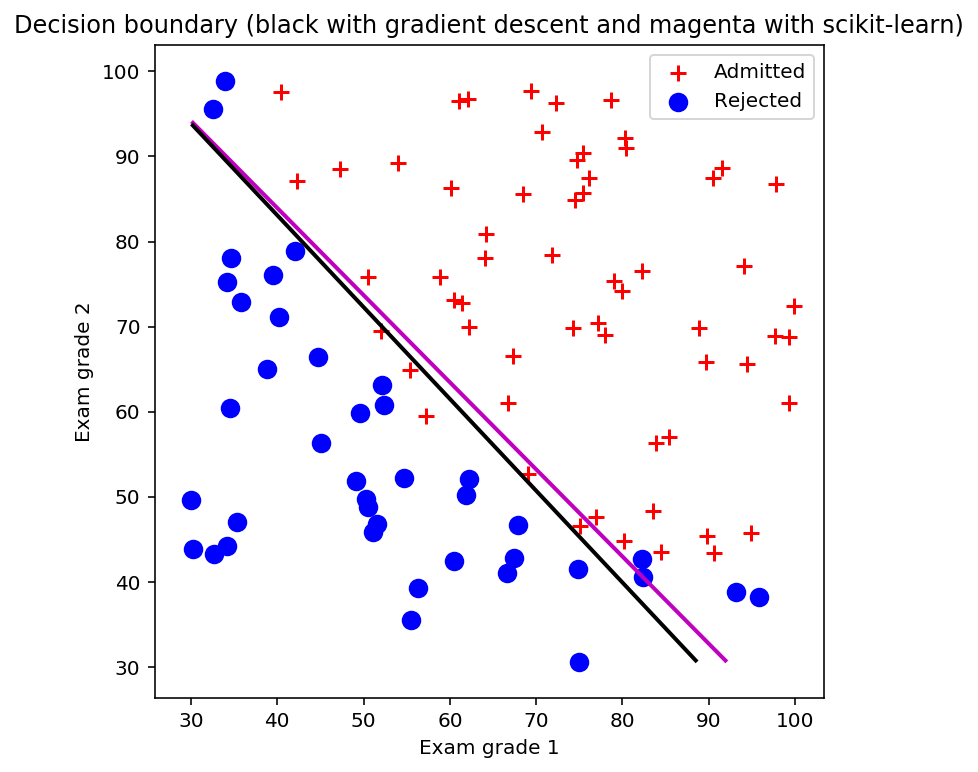

In [25]:
# run logistic regression with scikit-learn
start = time.time()
logreg_sklearn = LogisticRegression(C=1e6) # scikit-learn logistic regression
logreg_sklearn.fit(data[:,0:2], data[:,2]) # learn the model parameters #YOUR CODE HERE
print('Time=',time.time() - start)


# compute loss value
w_sklearn = np.zeros([3,1])
w_sklearn[0,0] = logreg_sklearn.intercept_
w_sklearn[1:3,0] = logreg_sklearn.coef_
print(w_sklearn)
loss_sklearn = loss_logreg(f_pred(X,w_sklearn),data[:,2][:,None])
print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1]) 


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_admit], x2[idx_admit], s=60, c='r', marker='+', linewidths=2, label='Admitted') #YOUR CODE HERE
plt.scatter(x1[idx_rejec], x2[idx_rejec], s=60, c='b', marker='o', linewidths=2, label='Rejected') #YOUR CODE HERE
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')

x1_min, x1_max = X[:,1].min(), X[:,1].max() # grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w_sklearn)
p = p.reshape(xx1.shape)
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='m');
plt.contour(xx1, xx2, p_gd, [0.5], linewidths=2, colors='k');

plt.title('Decision boundary (black with gradient descent and magenta with scikit-learn)')
plt.legend()
plt.show()

In [41]:
# Predict probability of admission 
y_pred =  sigmoid(np.array([[1,45,85]]).dot(w_sklearn))
print('Probability of admission is',y_pred[0]) 

Probability of admission is [0.77457515]


In [42]:
print('Probability of rejection is',1-y_pred[0]) 

Probability of rejection is [0.22542485]


In [43]:
#quadratic
# construct the data matrix X
n = data.shape[0]
X = np.ones([n,6]) 
X[:,1:3] = data[:,0:2]
X[:,3] = data[:,0]**2
X[:,4] = data[:,1]**2
X[:,5] = data[:,0]*data[:,1]

# run gradient descent algorithm
start = time.time()
w_init = np.array([0,0,0,0,0,0])[:,None]
tau = 1e-1; max_iter = 5000
w, L_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
plt.figure(4)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),6]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
X2[:,3] = xx1.reshape(-1)**2
X2[:,4] = xx2.reshape(-1)**2
X2[:,5] = xx1.reshape(-1)*xx2.reshape(-1)
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (quadratic)')
plt.show()

/Applications/miniconda3/envs/CE9010_2018/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Applications/miniconda3/envs/CE9010_2018/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: too many values to unpack (expected 2)